In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Checkpoint regressions

## Making nice dataframes

### dataframes for each book

In [2]:
checkpoints_df = pd.read_csv('checkpoints.csv')

checkpoints_df['book_version'] = checkpoints_df['book'] + " " + checkpoints_df['release']

# Adjust the book_with_versions list based on the available book_version in the dataframe
books_with_versions = [
    "College / Advanced Statistics and Data Science (ABCD) v5.0",
    "College / Advanced Statistics and Data Science (ABCD) v5.1.1",
    "College / Statistics and Data Science (ABC) v5.0",
    "College / Statistics and Data Science (ABC) v5.1.1",
    "College / Statistics and Data Science (ABC) v5.2",
    "High School / Advanced Statistics and Data Science I (ABC) v5.0"
]

# Create a dictionary of dataframes for each adjusted book and version
book_dfs = {}
for book in books_with_versions:
    book_dfs[book] = checkpoints_df[checkpoints_df['book_version'] == book]

# Now we have separate dataframes for each book-version pair that exists in the data
# Let's display the number of rows for each dataframe to confirm their creation
df_counts = {book: book_dfs[book].shape[0] for book in books_with_versions}
df_counts


{'College / Advanced Statistics and Data Science (ABCD) v5.0': 11232,
 'College / Advanced Statistics and Data Science (ABCD) v5.1.1': 4752,
 'College / Statistics and Data Science (ABC) v5.0': 31920,
 'College / Statistics and Data Science (ABC) v5.1.1': 720,
 'College / Statistics and Data Science (ABC) v5.2': 5856,
 'High School / Advanced Statistics and Data Science I (ABC) v5.0': 1872}

In [3]:
print(checkpoints_df.columns)


Index(['book', 'release', 'institution_id', 'class_id', 'student_id',
       'response', 'construct', 'chapter_number', 'EOC', 'n_possible',
       'n_correct', 'n_attempt', 'book_version'],
      dtype='object')


### Dataframes for each institution

In [4]:
# Get unique institution_ids
unique_institution_ids = checkpoints_df['institution_id'].unique()

# Create a dictionary of dataframes for each unique institution_id
institution_dfs = {institution_id: checkpoints_df[checkpoints_df['institution_id'] == institution_id]
                   for institution_id in unique_institution_ids}

# Verify creation by showing the number of dataframes created which should equal the number of unique institution_ids
num_institution_dfs = len(institution_dfs)
num_institution_dfs, unique_institution_ids[:5]  # Display the count and first 5 institution_ids

(12,
 array(['04157183-8665-400a-925d-3bbb70ffe45e',
        '292cff87-3c74-4e94-8622-233afb0427dd',
        '2f830a93-5a14-4aff-a6e8-c7d2562e2007',
        '364da48a-e0b2-4507-bc31-e7761fe16e95',
        '94a809a9-a0ef-4c47-8d96-3a5ad76f674b'], dtype=object))

## Probabilty distrubutions of EOC at each institution

/Users/michaelthomas/anaconda3/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


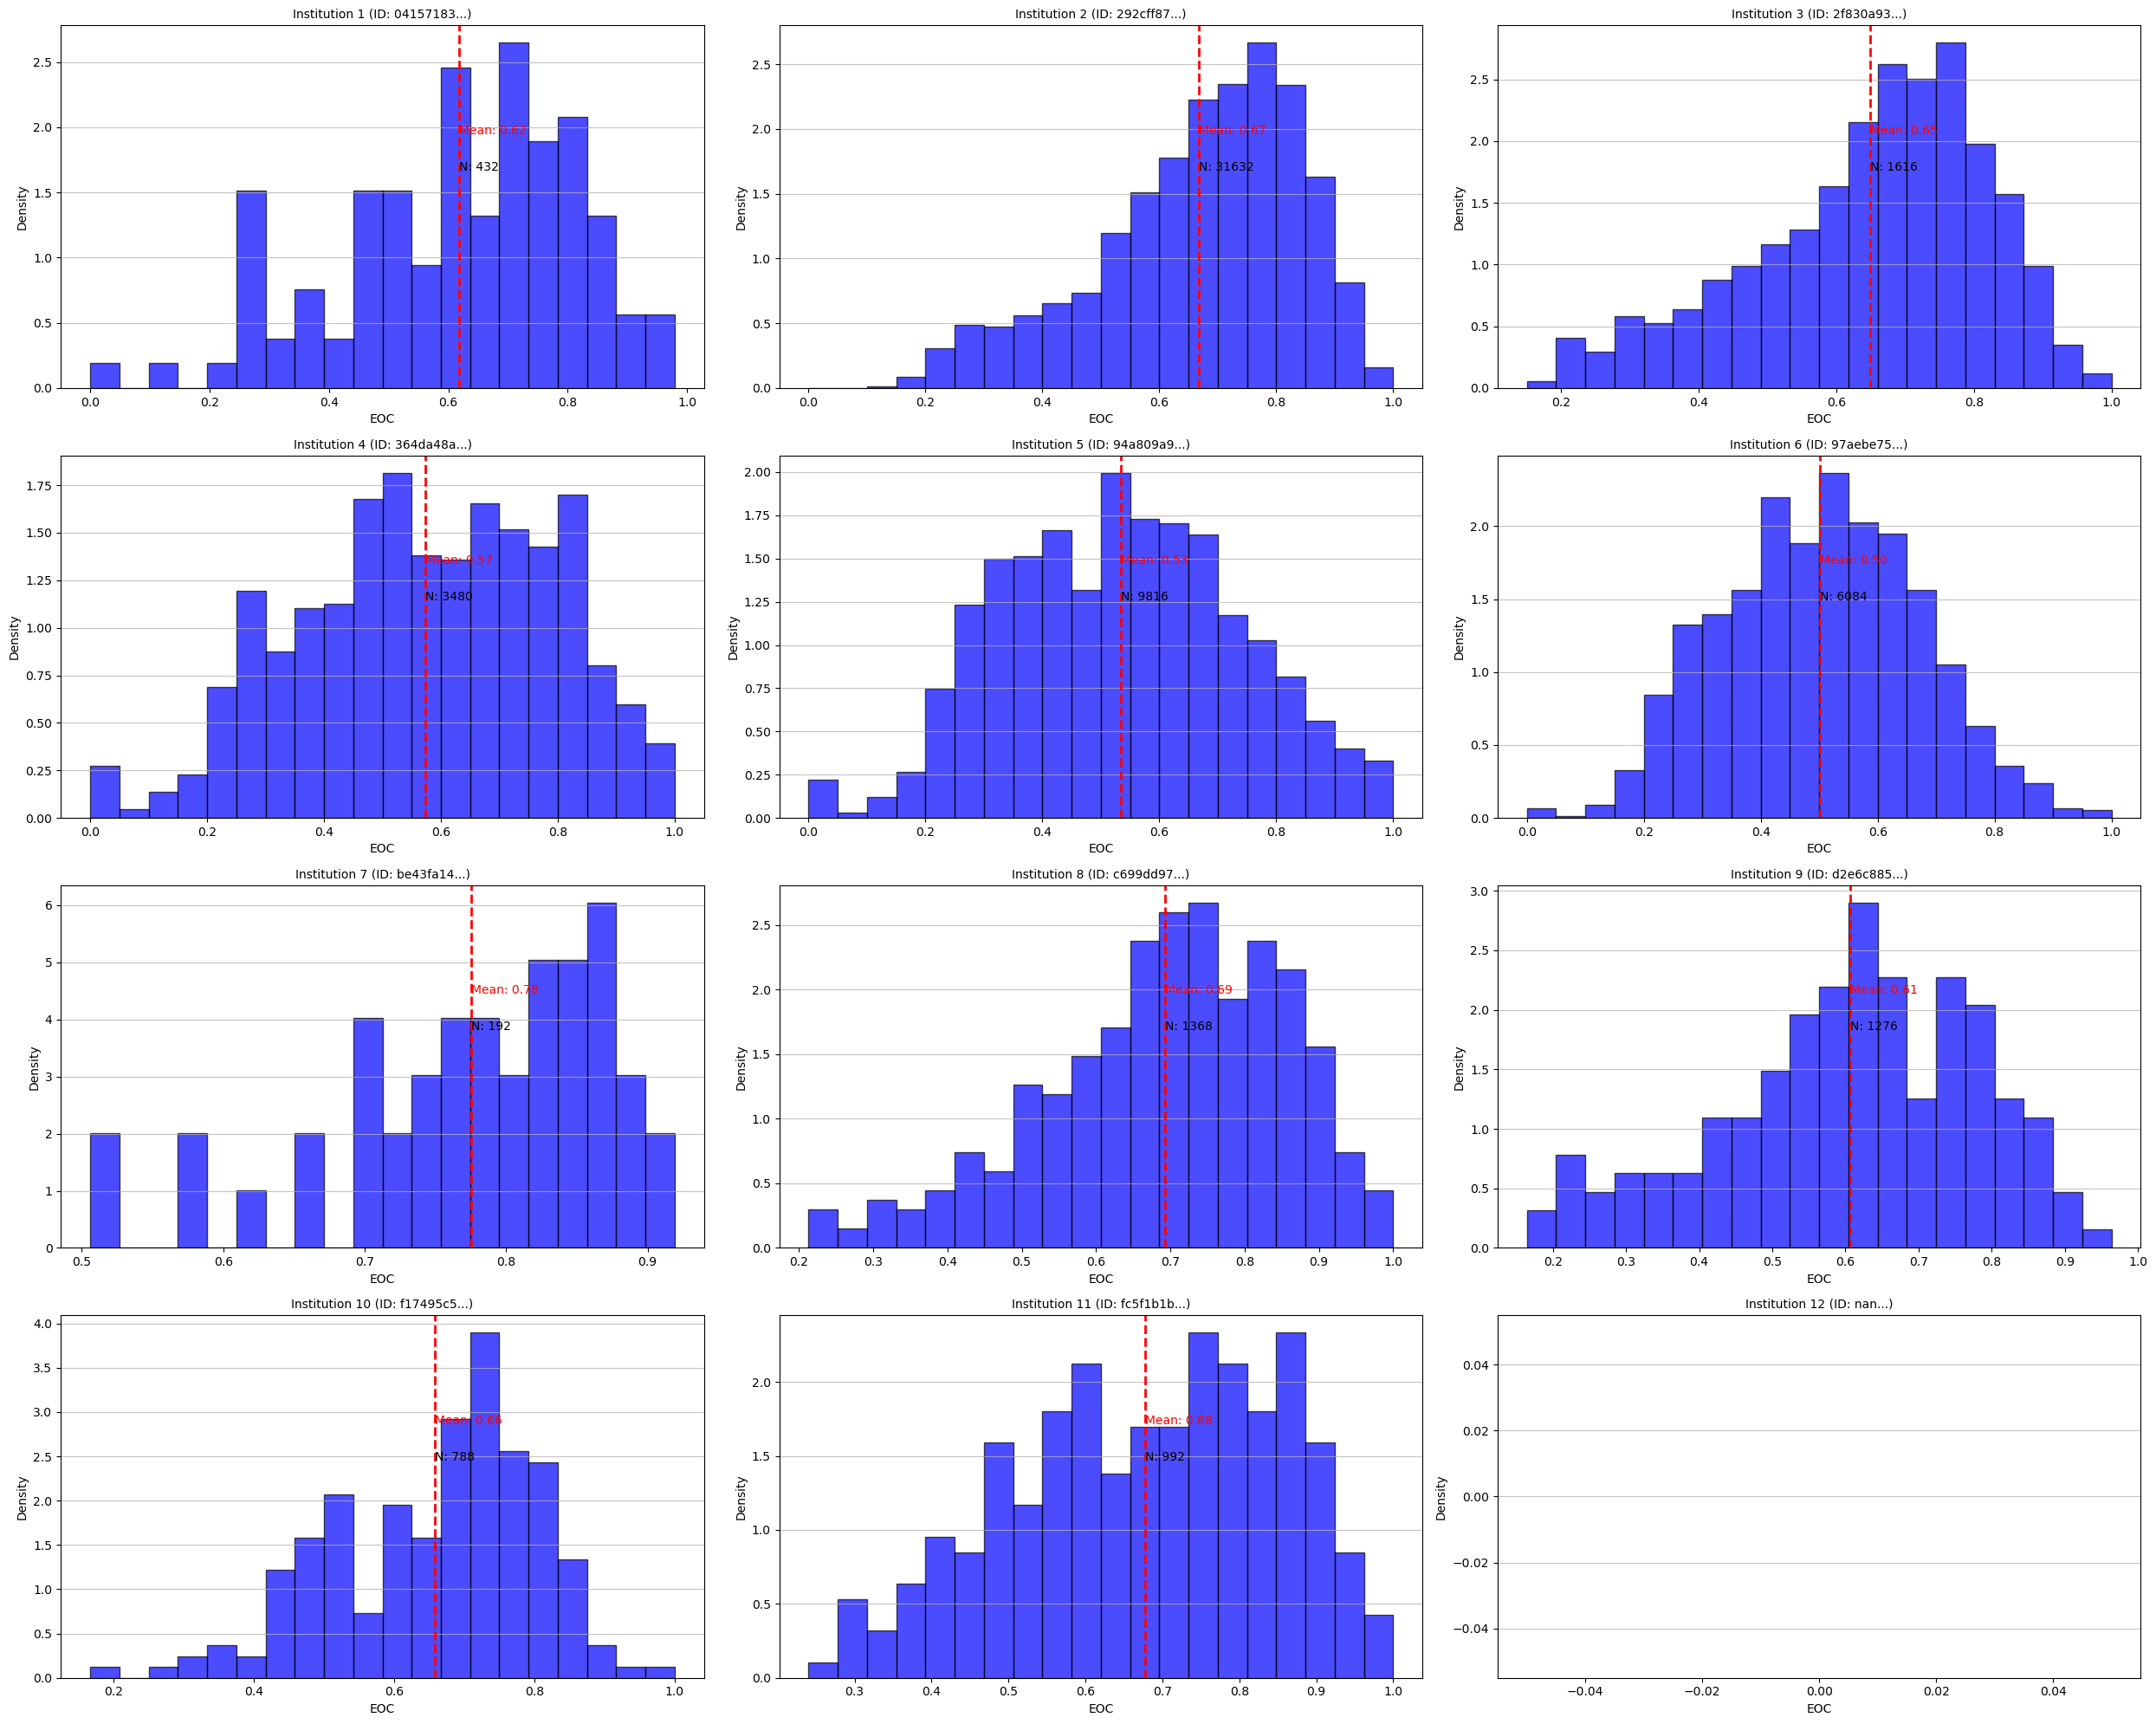

In [5]:
bins = 20
# Create a larger figure to plot histograms with the number of observations and the mean
plt.figure(figsize=(25, 20))

# Loop through each institution dataframe and create a histogram of the EOC distribution
for idx, (institution_id, institution_df) in enumerate(institution_dfs.items(), 1):
    # Ensure institution_id is a string before slicing
    institution_id_str = str(institution_id)
    
    # Drop NaN values from EOC for accurate distribution representation
    eoc_data = institution_df['EOC'].dropna()
    
    plt.subplot(4, 3, idx)  # 4x3 subplot grid, idx is the current position
    plt.hist(eoc_data, bins=bins, density=True, alpha=0.7, color='blue', edgecolor='black')
    
    # Calculate the number of observations and the mean of the EOC data
    num_observations = eoc_data.count()
    mean_eoc = eoc_data.mean()
    
    # Plot the mean
    plt.axvline(mean_eoc, color='red', linestyle='dashed', linewidth=2)
    
    # Add text for number of observations and mean
    plt.text(mean_eoc, plt.ylim()[1] * 0.7, f'Mean: {mean_eoc:.2f}', color='red')
    plt.text(mean_eoc, plt.ylim()[1] * 0.6, f'N: {num_observations}', color='black')
    
    plt.title(f'Institution {idx} (ID: {institution_id_str[:8]}...)', fontsize=10)
    plt.xlabel('EOC')
    plt.ylabel('Density')
    plt.grid(axis='y', alpha=0.75)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## Plotting number of EOC attempts at each institution

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


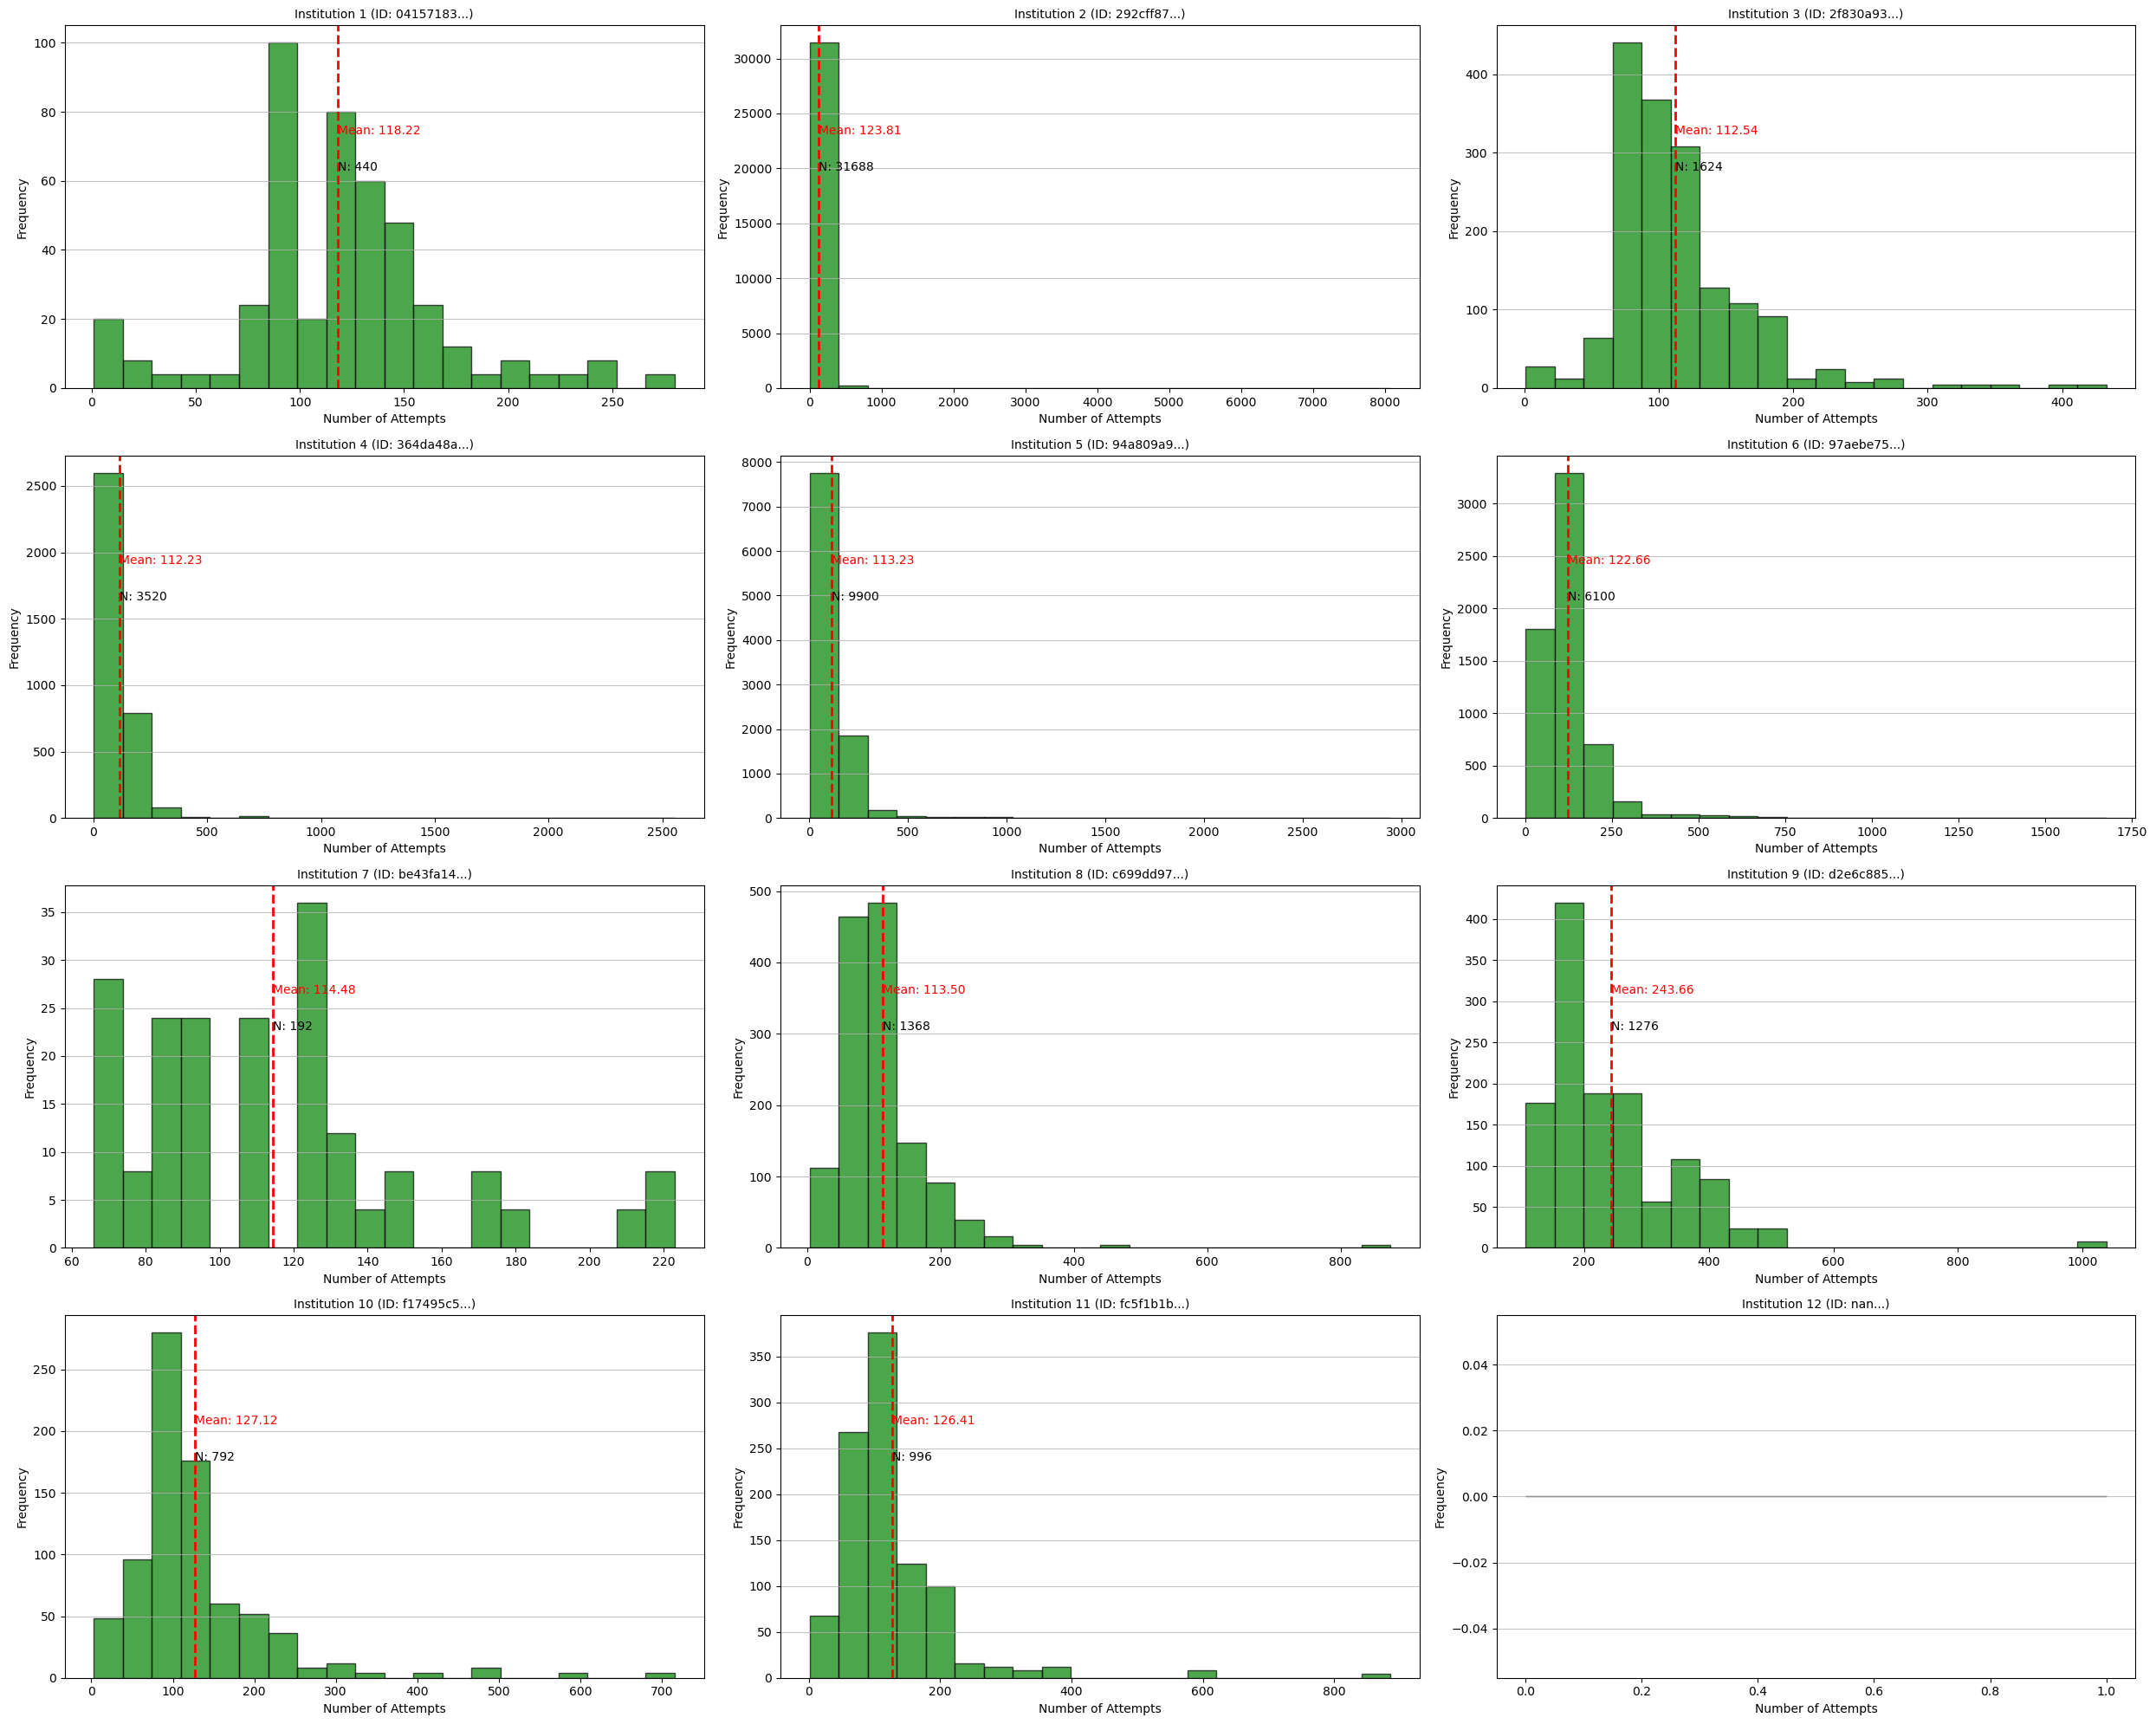

In [6]:
# Create a larger figure to plot histograms of the n_attempt value for each institution
plt.figure(figsize=(25, 20))

# Loop through each institution dataframe and create a histogram of the n_attempt distribution
for idx, (institution_id, institution_df) in enumerate(institution_dfs.items(), 1):
    # Ensure institution_id is a string before slicing
    institution_id_str = str(institution_id)
    
    # Drop NaN values from n_attempt for accurate distribution representation
    n_attempt_data = institution_df['n_attempt'].dropna()
    
    plt.subplot(4, 3, idx)  # 4x3 subplot grid, idx is the current position
    plt.hist(n_attempt_data, bins=bins, alpha=0.7, color='green', edgecolor='black')
    
    # Calculate the number of observations and the mean of the n_attempt data
    num_observations = n_attempt_data.count()
    mean_attempts = n_attempt_data.mean()
    
    # Plot the mean
    plt.axvline(mean_attempts, color='red', linestyle='dashed', linewidth=2)
    
    # Add text for number of observations and mean
    plt.text(mean_attempts, plt.ylim()[1] * 0.7, f'Mean: {mean_attempts:.2f}', color='red')
    plt.text(mean_attempts, plt.ylim()[1] * 0.6, f'N: {num_observations}', color='black')
    
    plt.title(f'Institution {idx} (ID: {institution_id_str[:8]}...)', fontsize=10)
    plt.xlabel('Number of Attempts')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Cleaning checkpoints_df

In [7]:
# Remove rows where 'EOC' is NaN in the checkpoints_df dataframe
checkpoints_df_cleaned = checkpoints_df.dropna(subset=['EOC'])

# Display the first few rows of the cleaned dataframe to verify the changes
checkpoints_df_cleaned.head()


,book,release,institution_id,class_id,student_id,response,construct,chapter_number,EOC,n_possible,n_correct,n_attempt,book_version
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,4.0,Cost,2,0.514563,103.0,53.0,200.0,College / Statistics and Data Science (ABC) v5.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,4.0,Cost,3,0.642857,112.0,72.0,164.0,College / Statistics and Data Science (ABC) v5.0
6,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3.0,Cost,5,0.436620,71.0,31.0,119.0,College / Statistics and Data Science (ABC) v5.0
7,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3.0,Cost,6,0.600000,125.0,75.0,243.0,College / Statistics and Data Science (ABC) v5.0
9,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2.0,Cost,8,0.524390,82.0,43.0,113.0,College / Statistics and Data Science (ABC) v5.0


In [8]:
# Pivot the 'construct' and 'response' columns of the cleaned dataframe
checkpoints_df = checkpoints_df_cleaned.pivot_table(
    index=['book', 'release', 'institution_id', 'class_id', 'student_id', 'chapter_number', 'EOC', 'n_possible', 'n_correct', 'n_attempt', 'book_version'],
    columns='construct',
    values='response',
    aggfunc='first'  # Use the first response value in case of duplicates
).reset_index()

# Display the first few rows of the pivoted dataframe to verify the transformation
checkpoints_df


construct,book,release,institution_id,class_id,student_id,chapter_number,EOC,n_possible,n_correct,n_attempt,book_version,Cost,Expectancy,Intrinsic Value,Utility Value
0,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,2,0.580952,105.0,61.0,210.0,College / Advanced Statistics and Data Science...,2.0,5.0,5.0,6.0
1,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,3,0.765217,115.0,88.0,190.0,College / Advanced Statistics and Data Science...,3.0,4.0,5.0,5.0
2,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,4,0.583333,133.0,77.0,254.0,College / Advanced Statistics and Data Science...,3.0,5.0,5.0,5.0
3,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,5,0.426667,75.0,32.0,150.0,College / Advanced Statistics and Data Science...,3.0,4.0,5.0,5.0
4,College / Advanced Statistics and Data Science...,v5.0,292cff87-3c74-4e94-8622-233afb0427dd,b7489f46-1d28-4c69-9901-3fb8bf9b85a6,0096491a-77bf-4e79-b906-fc7a8e5e57a6,6,0.530769,130.0,69.0,283.0,College / Advanced Statistics and Data Science...,4.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10985,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,6,0.516129,62.0,32.0,86.0,High School / Advanced Statistics and Data Sci...,2.0,4.0,5.0,5.0
10986,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,7,0.600000,65.0,39.0,87.0,High School / Advanced Statistics and Data Sci...,3.0,2.0,5.0,5.0
10987,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,9,0.574468,47.0,27.0,57.0,High School / Advanced Statistics and Data Sci...,2.0,5.0,5.0,5.0
10988,High School / Advanced Statistics and Data Sci...,v5.0,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,10,0.476923,65.0,31.0,86.0,High School / Advanced Statistics and Data Sci...,2.0,5.0,5.0,5.0


## regressing EOC on Cost, Expectancy, Intrinsic Value, Utility Value, chapter

In [9]:
import statsmodels.api as sm

# Selecting the independent variables (predictors) and the dependent variable
X = checkpoints_df[['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value', 'chapter_number']].fillna(0)  # Replace NaNs with 0
y = checkpoints_df['EOC']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Fitting the linear regression model
model = sm.OLS(y, X).fit()

# Summary of the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EOC   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          5.69e-300
Time:                        11:24:09   Log-Likelihood:                 3439.0
No. Observations:               10990   AIC:                            -6866.
Df Residuals:                   10984   BIC:                            -6822.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5439      0.010     54.451      0.000       0.524       0.564
Cost               -0.0130      0.001     -9.661      0.000      -0.016      -0.010
Expectancy          0.0298      0.002     15.582      0.000       0.026       0.034
Intrinsic Value    -0.0050      0.002     -3.305      0.001      -0.008      -0.002
Utility Value       0.0190      0.002      9.619      0.000       0.015       0.023
chapter_number     -0.0116      0.001    -21.936      0.000      -0.013      -0.011
==============================================================================
Omnibus:                      379.065   Durbin-Watson:                   0.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.797
Skew:                          -0.403   Prob(JB):                     1.01e-79
Kurtosis:                       2.619   Cond. No.                         64.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Adding dummies for each student

In [10]:
# Creating dummy variables for each unique student_id
student_dummies = pd.get_dummies(checkpoints_df['student_id'], drop_first=True)

# Combining the dummy variables with the original dataframe
X_with_dummies = pd.concat([X, student_dummies], axis=1)

# Dropping the constant to avoid multicollinearity with the dummy variables
X_with_dummies = X_with_dummies.drop(['const'], axis=1)

# Fitting the fixed effects model
fixed_effects_model = sm.OLS(y, X_with_dummies).fit()

# Summary of the fixed effects regression results
fixed_effects_model_summary = fixed_effects_model.summary()


In [11]:
#fixed_effects_model_summary
variables = ['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value']
coefficients = fixed_effects_model.params[variables]
errors = fixed_effects_model.bse[variables]

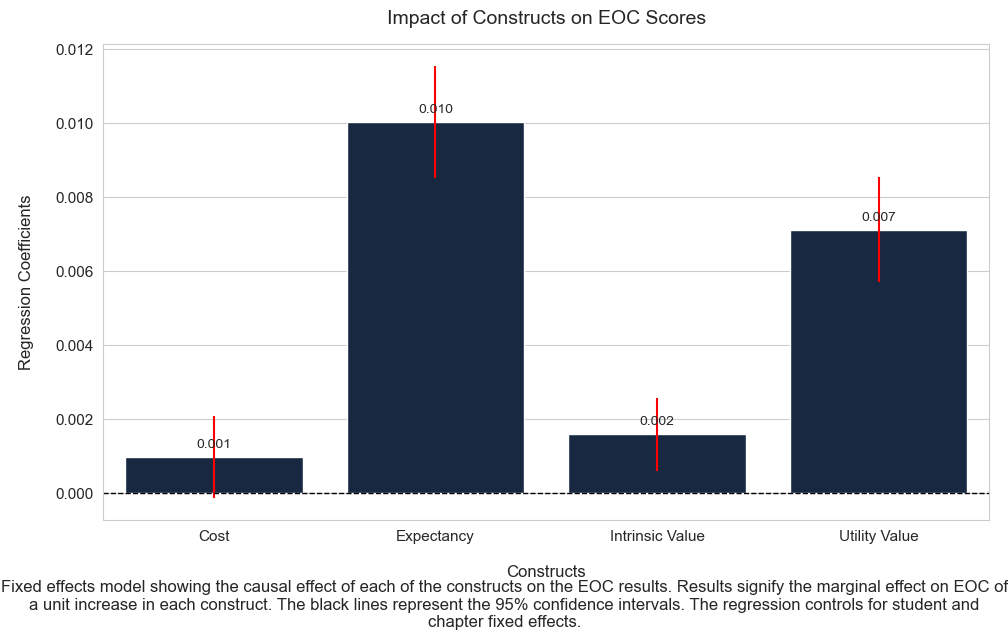

In [12]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the plot with seaborn for a more visually appealing output
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=coefficients.index, y=coefficients, yerr=errors, ecolor='red', color="#102747", capsize=0.1)

# Add annotations for the bar values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Customize the plot appearance
ax.set_xlabel('Constructs', fontsize=12, labelpad=15)
ax.set_ylabel('Regression Coefficients', fontsize=12, labelpad=15)
ax.set_title('Impact of Constructs on EOC Scores', fontsize=14, pad=15)
ax.tick_params(labelsize=11)

# Adding a zero line for reference
ax.axhline(0, color='black', linewidth=1, linestyle='--')

# Adding a caption
caption = "Fixed effects model showing the causal effect of each of the constructs on the EOC results. Results signify the marginal effect on EOC of a unit increase in each construct. The black lines represent the 95% confidence intervals. The regression controls for student and chapter fixed effects."
plt.figtext(0.5, -0.05, caption, wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Plotting constructs for varying EOC ranges

In [15]:
# Grouping the data by 'student_id' and calculating the mean for specified columns
student_averages = checkpoints_df.groupby('student_id').agg(
    Cost=('Cost', 'mean'),
    Expectancy=('Expectancy', 'mean'),
    Intrinsic_Value=('Intrinsic Value', 'mean'),
    Utility_Value=('Utility Value', 'mean'),
    Avg_EOC=('EOC', 'mean')
).reset_index()

# Displaying the first few rows of the new dataframe
student_averages.head()

,student_id,Cost,Expectancy,Intrinsic_Value,Utility_Value,Avg_EOC
0,001824fb-a2fd-431d-aef6-7a1250d97a62,4.181818,3.727273,4.636364,4.090909,0.726496
1,0096491a-77bf-4e79-b906-fc7a8e5e57a6,3.272727,4.272727,5.000000,5.181818,0.564444
2,00a53a52-aa0e-4ddc-afa8-2c50c21dfd03,3.500000,4.750000,4.750000,4.500000,0.542016
3,00fe5bb2-6b64-4a36-a706-eac4dc124ea7,3.000000,3.916667,4.181818,4.333333,0.837403
4,016e2fcf-0cc2-42ad-844d-e1057b5081cc,4.000000,5.000000,3.000000,4.000000,0.772727


NameError: name 'percentile_means' is not defined

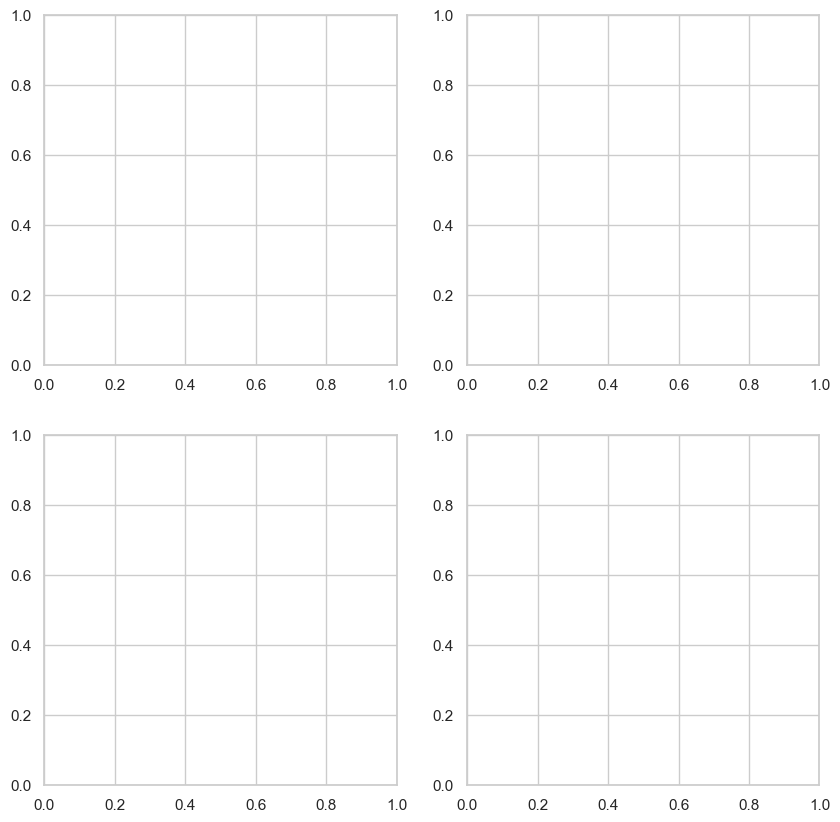

In [14]:
# Assuming percentile_means is already calculated and contains the required data
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2x2 grid of plots

# Define the constructs and their plot-friendly names
constructs = ['Cost', 'Expectancy', 'Intrinsic_Value', 'Utility_Value']
plot_labels = ['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value']

for i, ax in enumerate(axs.flat):
    sns.barplot(x='EOC_Percentile_Range', y=constructs[i], data=percentile_means, ax=ax, palette='coolwarm')
    ax.set_title(f'Average {plot_labels[i]} by EOC Percentile (Quartiles)')
    ax.set_xlabel('EOC Percentile Range')
    ax.set_ylabel(f'Average {plot_labels[i]}')

plt.tight_layout()
plt.show()

In [ ]:
student_averages

NameError: name 'student_averages' is not defined

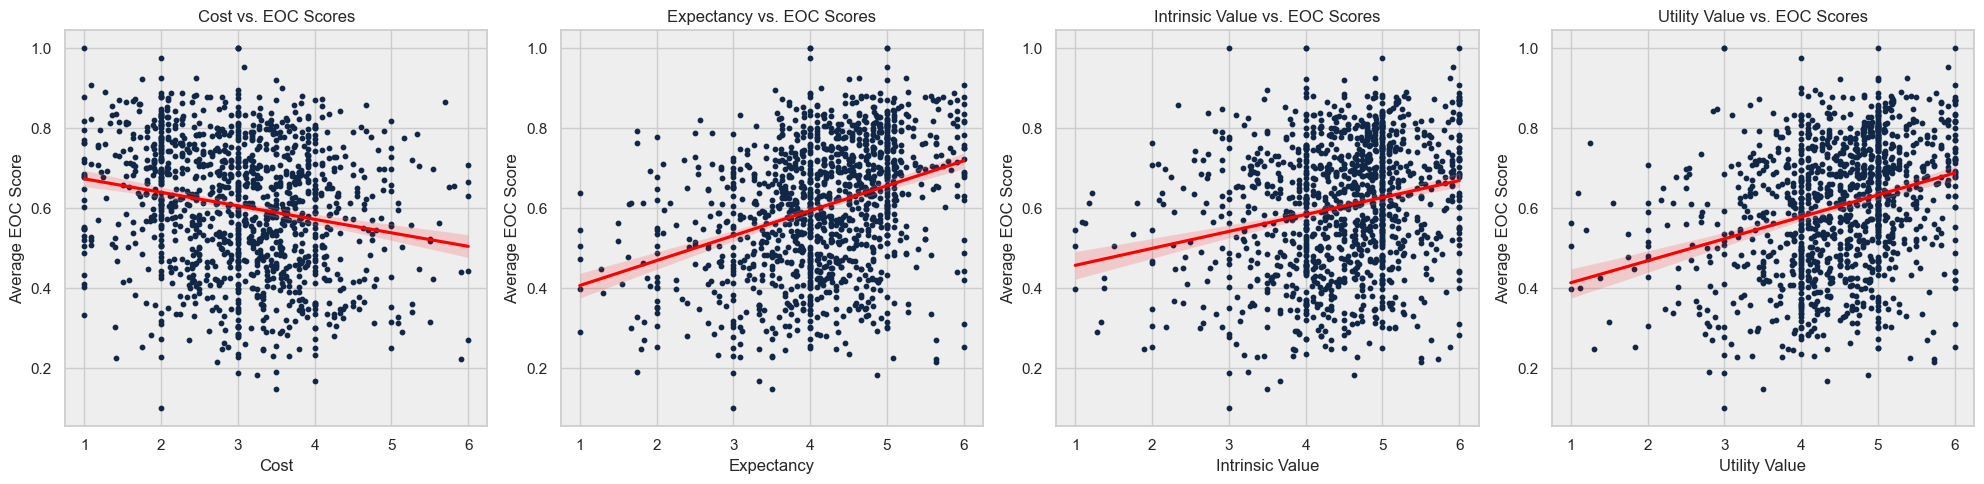

In [26]:

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Creating a 1x4 subplot grid
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjusted for a linear layout

# Defining the constructs and their corresponding labels
constructs = ['Cost', 'Expectancy', 'Intrinsic_Value', 'Utility_Value']
plot_labels = ['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value']

# Plotting each construct with a regression line
for i, ax in enumerate(axs):
    # Set individual subplot background color
    ax.set_facecolor('#EEEEEE')
    
    sns.regplot(y='Avg_EOC', x=constructs[i], data=student_averages, ax=ax,
                scatter_kws={'alpha':1, 's': 10, 'color': '#102747'},  # Adjusted color and size here
                line_kws={'color':'red'})
    ax.set_title(f'{plot_labels[i]} vs. EOC Scores')
    ax.set_ylabel('Average EOC Score')
    ax.set_xlabel(plot_labels[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Function to clean the data by replacing NaNs and removing infinite values
def clean_data(X):
    X = X.fillna(X.mean())  # Replace NaNs with the mean of the column
    X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values
    return X

# Function to perform regression and return the summary
def perform_regression(y, X):
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    return model.summary()

# Initialize a dictionary to store summaries
regression_summaries = {}

# Iterate over each construct and perform regression
for construct in ['Cost', 'Expectancy', 'Intrinsic_Value', 'Utility_Value']:
    clean_X = clean_data(student_averages[construct])
    clean_y = clean_data(student_averages['Avg_EOC'])
    
    if not clean_X.isnull().any() and not clean_y.isnull().any():  # Ensure no NaNs
        summary = perform_regression(clean_y, clean_X)
        regression_summaries[construct] = summary
    else:
        print(f"Data for {construct} still contains NaNs or infinite values after cleaning.")

regression_summaries

{'Cost': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                Avg_EOC   R-squared:                       0.040
 Model:                            OLS   Adj. R-squared:                  0.039
 Method:                 Least Squares   F-statistic:                     51.99
 Date:                Sat, 02 Mar 2024   Prob (F-statistic):           9.62e-13
 Time:                        02:30:19   Log-Likelihood:                 516.28
 No. Observations:                1249   AIC:                            -1029.
 Df Residuals:                    1247   BIC:                            -1018.
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------------------